In [1]:
import argparse
import sys

import gym
from gym import wrappers, logger

import numpy as np
import GPy

logger.set_level(logger.INFO)

env = gym.make("MountainCar-v0")

INFO: Making new env: MountainCar-v0
WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


 /home/nishadg/Documents/gym/gym/__init__.py:22: UserWarning:DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.


In [2]:
outdir = '/tmp/random-agent-results'
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)


episode_count = 100
reward = 0
done = False

env.reset()

 /home/nishadg/Documents/gym/gym/__init__.py:29: UserWarning:DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.wrappers. Please run "import gym.wrappers" to load gym.wrappers on your own. This warning will turn into an error in a future version of gym.


INFO: Clearing 6 monitor files from previous run (because force=True was provided)
INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.0.24334.video000000.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.0.24334.video000000.mp4
DEBUG: Starting ffmpeg with "ffmpeg -nostats -loglevel error -y -r 30 -f rawvideo -s:v 600x400 -pix_fmt rgb24 -i - -vcodec libx264 -pix_fmt yuv420p /tmp/random-agent-results/openaigym.video.0.24334.video000000.mp4"


array([-0.58912799,  0.        ])

(500, 2)


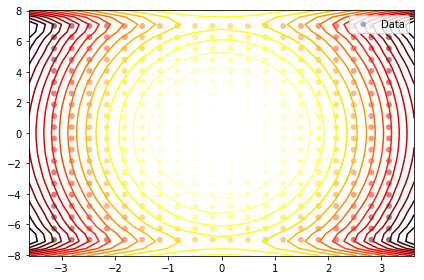

In [45]:
supports = []
for i in np.linspace(-np.pi,np.pi,20):
    for j in np.linspace(-7,7,20):
        supports.append(np.array([i,j]))
for i in np.linspace(-np.pi/16,np.pi/16,10):
    for j in np.linspace(-0.1,0.1,10):
        supports.append(np.array([i,j]))
supports = np.array(supports)
print supports.shape

f = lambda s: [env.env.env.get_cost(s,0.0)]

Y = np.apply_along_axis(f, 1, supports)

V = GPy.models.GPRegression(supports, Y, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)

V.plot()

In [46]:
VS = []
for i in range(10):
    print "ITERATION %d" % i
    newY = []
    for s in supports:
        actions = np.reshape(np.linspace(-2,2,200),(-1,1))
        def VAL(u):
            return env.env.env.get_cost(s,u) + 0.9 * V.predict(np.array([env.env.env.preview_step(s,u)]))[0]
        vals = np.apply_along_axis(VAL, 1, actions)
        newY.append([vals.min()])
    newY = np.array(newY)
    print newY.shape
    V = GPy.models.GPRegression(supports, newY, GPy.kern.src.rbf.RBF(input_dim=2,lengthscale=1.0),noise_var=0.0)
    VS.append(V)
VFinal = V

ITERATION 0
(500, 1)
ITERATION 1
(500, 1)
ITERATION 2
(500, 1)
ITERATION 3
(500, 1)
ITERATION 4
(500, 1)
ITERATION 5
(500, 1)
ITERATION 6
(500, 1)
ITERATION 7
(500, 1)
ITERATION 8
(500, 1)
ITERATION 9
(500, 1)


In [3]:
VS[-1].plot()

NameError: name 'VS' is not defined

In [22]:
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)

[0L]

In [52]:
env.reset()
while True:
    s = env.env.env.state
    print s
    actions = np.reshape(np.linspace(-2,2,200),(-1,1))
    def VAL(u):
        return env.env.env.get_cost(s,u) + 0.9 * VFinal.predict(np.array([env.env.env.preview_step(s,u)]))[0]
    vals = np.apply_along_axis(VAL, 1, actions)
    maxa = actions[vals.argmin()]
    env.step(maxa)
    print maxa

DEBUG: Closing video encoder: path=/tmp/random-agent-results/openaigym.video.5.23265.video000000.mp4
INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
DEBUG: Starting ffmpeg with "ffmpeg -nostats -loglevel error -y -r 30 -f rawvideo -s:v 500x500 -pix_fmt rgb24 -i - -vcodec libx264 -pix_fmt yuv420p /tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4"
[ 0.8337218  -0.41996531]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[0.33165829]
[0.8429774  0.18511194]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[2.]
[0.89523151 1.04508228]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-0.93467337]
[0.96973884 1.49014668]
DEBUG: Capturing video frame: path=/tmp

[-2.]
[16.63232042  6.63863717]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[16.91931852  5.73996188]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.1562131  4.7378917]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.34088892  3.69351628]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.47313708  2.64496333]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.55359145  1.60908725]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.58295315  0.58723412]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[17.56153653 -0.42833249]
DEBUG: Capturing video frame: path=/tmp

DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[ 0.88689449 -3.40129144]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[2.]
[ 0.76089667 -2.51995642]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-1.77889447]
[ 0.64741606 -2.26961226]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[ 0.54155272 -2.11726675]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[ 0.4400194  -2.03066638]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[ 0.33945947 -2.01119862]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[ 0.23638619 -2.06146553]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/o

[-14.93995371  -8.        ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-15.38100514  -8.        ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-15.80804878  -8.        ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-16.21930184  -8.        ]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-16.6159514   -7.93299122]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-16.99804094  -7.64179069]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-17.35909835  -7.22114826]
DEBUG: Capturing video frame: path=/tmp/random-agent-results/openaigym.video.5.23265.video000001.mp4
[-2.]
[-17.69777671  -6.77356732]
DEBUG: Capturing video fram

ResetNeeded: Trying to step environment which is currently done. While the monitor is active for Pendulum-v0, you cannot step beyond the end of an episode. Call 'env.reset()' to start the next episode.

In [24]:
env.env.env.env.env.get_cost

<Monitor<Monitor<Monitor<TimeLimit<PendulumEnv<Pendulum-v0>>>>>>